In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from transformers import pipeline
import os

In [2]:
# load classifier
classifier = pipeline("text-classification", 
                      model="j-hartmann/emotion-english-distilroberta-base", 
                      return_all_scores=False)

config.json:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/329M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/294 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

/home/ucloud/.local/lib/python3.10/site-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [50]:
# load data
datapath = os.path.join("..","data","Game_of_Thrones_Script.csv")

In [51]:
df = pd.read_csv(datapath)

In [52]:
specific_df = df.loc[:, ['Season', 'Sentence']]

In [53]:
specific_df

,Season,Sentence
0,Season 1,What do you expect? They're savages. One lot s...
1,Season 1,I've never seen wildlings do a thing like this...
2,Season 1,How close did you get?
3,Season 1,Close as any man would.
4,Season 1,We should head back to the wall.
...,...,...
23906,Season 8,I think we can all agree that ships take prece...
23907,Season 8,I think that's a very presumptuous statement.
23908,Season 8,I once brought a jackass and a honeycomb into ...
23909,Season 8,The Queen in the North!


In [55]:
labels = []

In [56]:
for line in specific_df["Sentence"]:
    label = classifier(line)
    labels.append(label[0]["label"])
    

In [57]:
specific_df["labels"] = labels

In [61]:
season2 = specific_df[specific_df['Season'] == 'Season 2']
season2

,Season,Sentence,labels
3179,Season 2,"Well struck… Well struck, Dog.",sadness
3180,Season 2,Did you like that?,neutral
3181,Season 2,"It was well struck, Your Grace.",neutral
3182,Season 2,I already said it was well struck.,neutral
3183,Season 2,"Yes, Your Grace.",neutral
...,...,...,...
7088,Season 2,Three blasts?,surprise
7089,Season 2,Run!,anger
7090,Season 2,Wait! Wait for me!,neutral
7091,Season 2,Grenn!,surprise


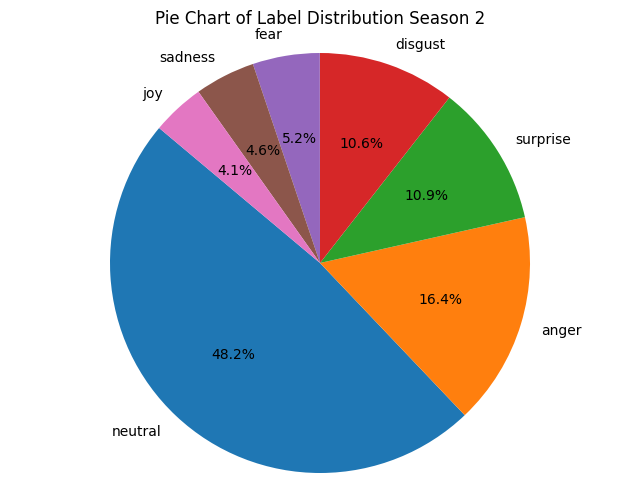

In [67]:

label_counts = season2['labels'].value_counts()
plt.figure(figsize=(8, 6))  # Set the figure size
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Pie Chart of Label Distribution Season 2')
plt.savefig(os.path.join("..","out","s2.png"))
plt.show()

In [58]:
specific_df

,Season,Sentence,labels
0,Season 1,What do you expect? They're savages. One lot s...,disgust
1,Season 1,I've never seen wildlings do a thing like this...,disgust
2,Season 1,How close did you get?,surprise
3,Season 1,Close as any man would.,neutral
4,Season 1,We should head back to the wall.,fear
...,...,...,...
23906,Season 8,I think we can all agree that ships take prece...,neutral
23907,Season 8,I think that's a very presumptuous statement.,disgust
23908,Season 8,I once brought a jackass and a honeycomb into ...,disgust
23909,Season 8,The Queen in the North!,surprise


In [59]:
len(labels)

23911

In [49]:
type(specific_df['Sentence'][18091])

float